In [30]:
import numpy as np
import pickle
import os
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
data = np.genfromtxt("C:/Users/mm5gg/Box Sync/MyData/rehab_exercise/initial_for_ubicomp/data.csv", delimiter=',', skip_header=1)
annots = np.genfromtxt("C:/Users/mm5gg/Box Sync/MyData/rehab_exercise/initial_for_ubicomp/annots.csv", delimiter=',')

In [50]:
print(data.shape)
print(annots.shape)

(55539, 7)
(24, 6)


In [54]:
def time_delay_matrix(d, m, tau):
    N = len(d)
    s = (m-1)*tau
    res = np.zeros((N-s, m))
    for i in range(s, N):
        for j in range(m):
            res[i-s, j] = d[i - j*tau]
    
    return res
    
def get_pca_matrix(X):
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    return X

def smooth_data(data, factor):
    count = len(data)
    for i in range(1, count):
        data[i, 4:] = factor*data[i-1, 4:] + (1-factor)*data[i, 4:]    
    return data
    

In [55]:
data = smooth_data(data, 0.9)

C:\Users\mm5gg\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


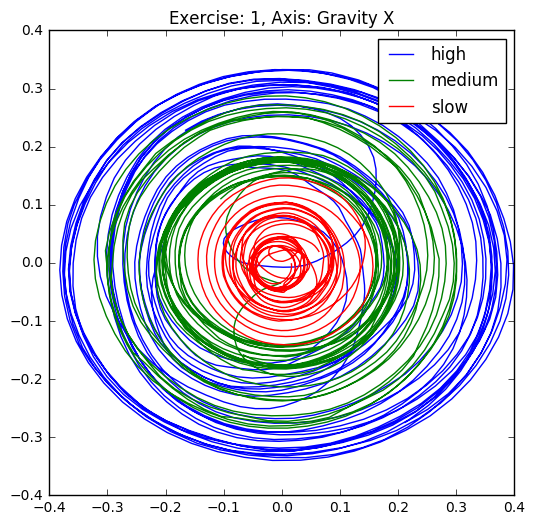

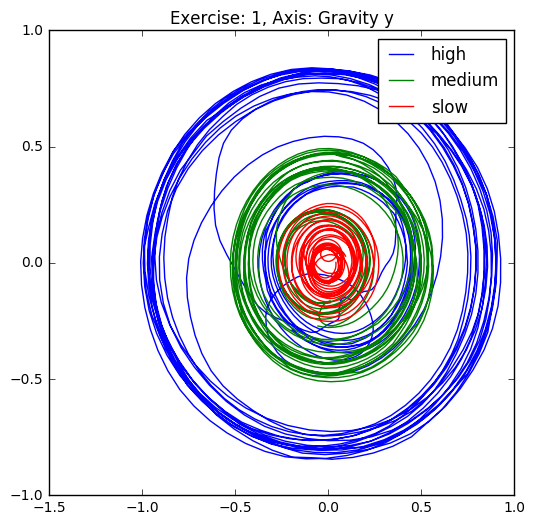

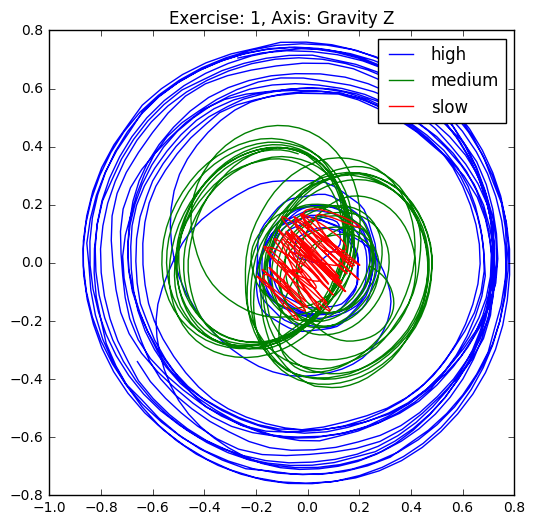

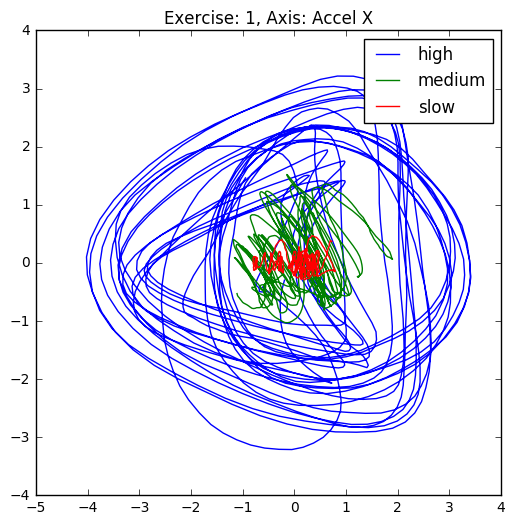

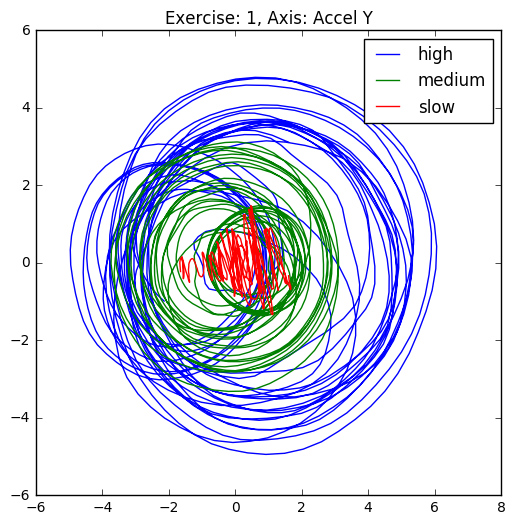

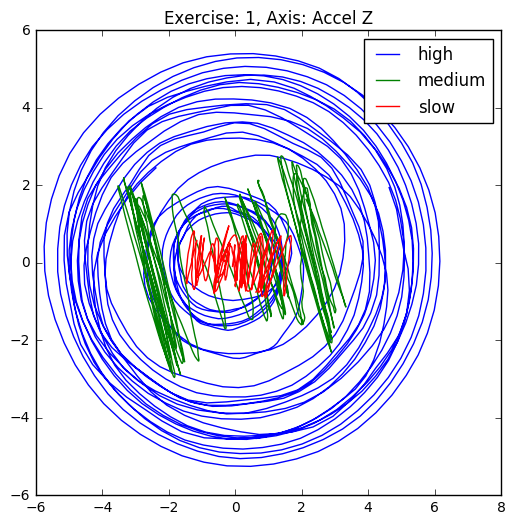

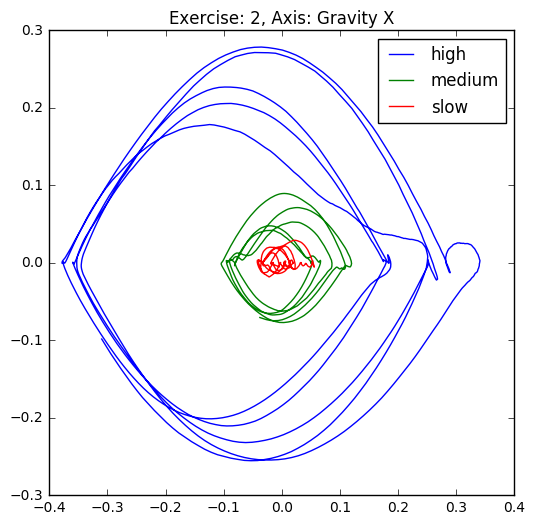

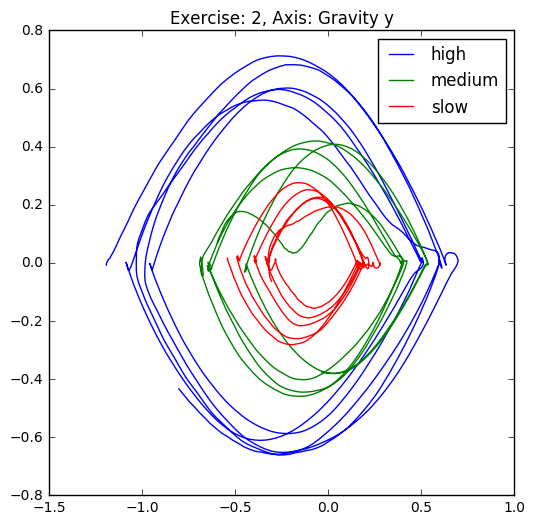

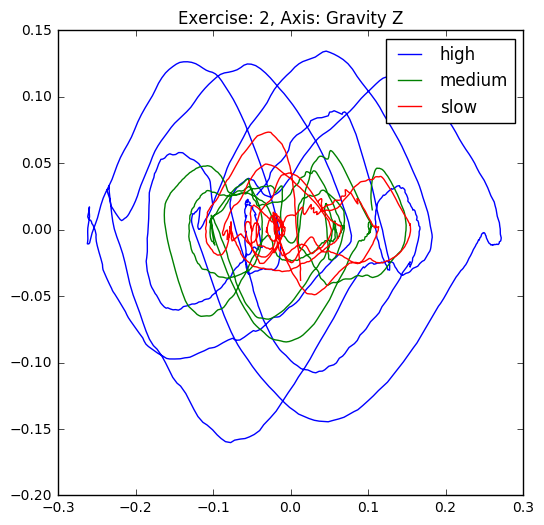

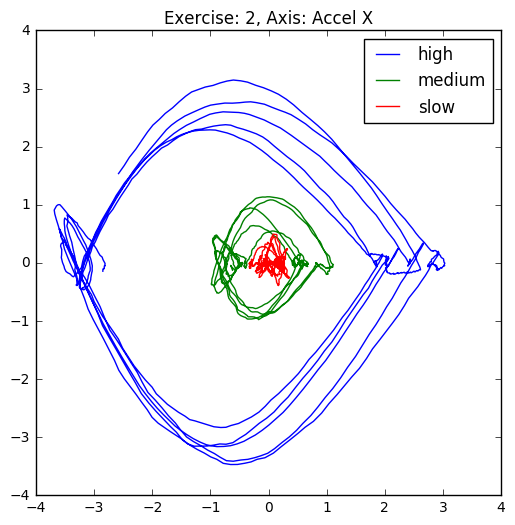

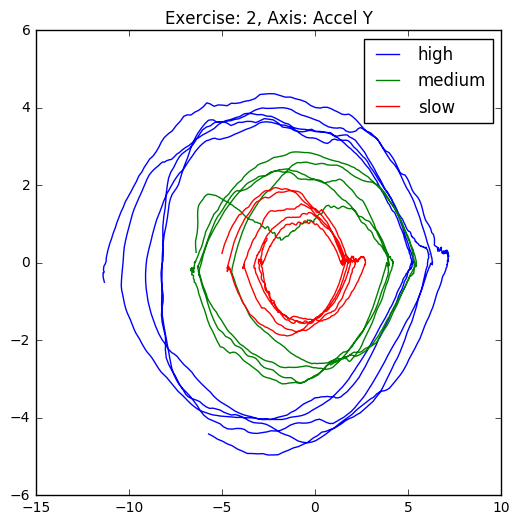

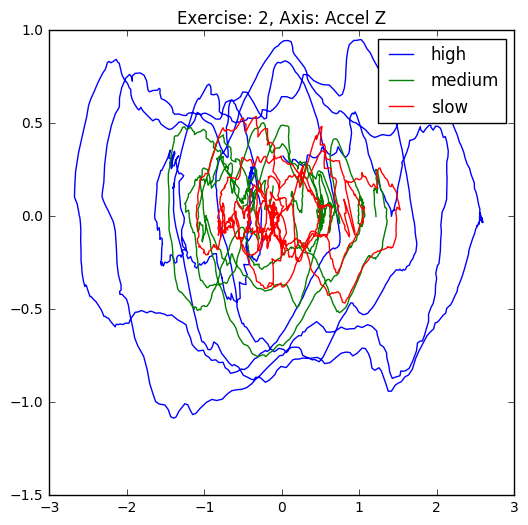

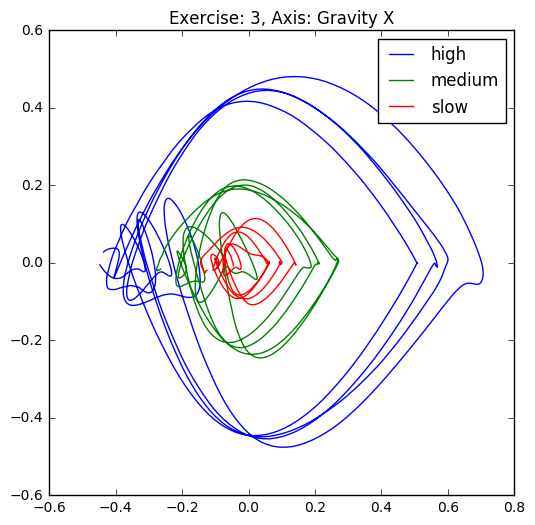

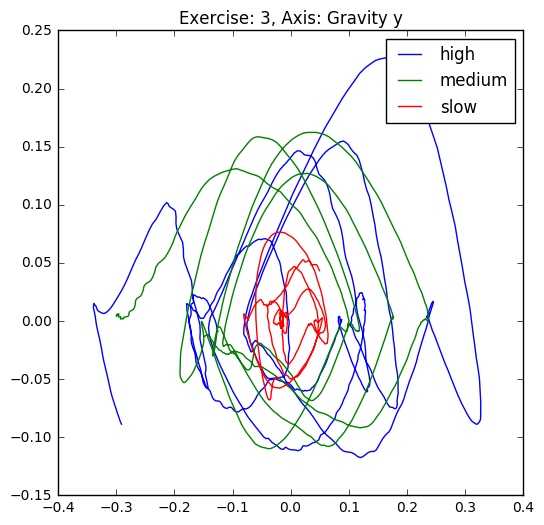

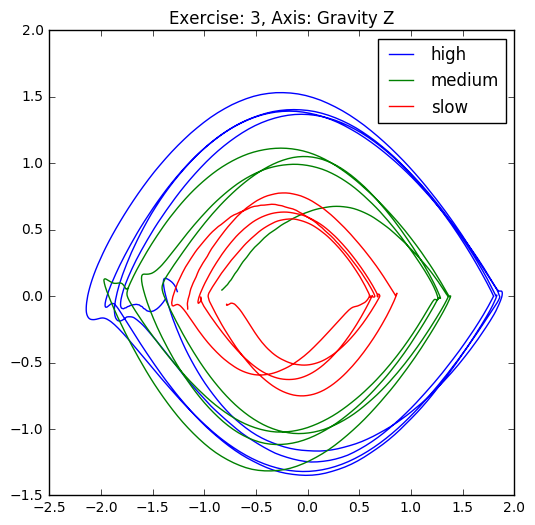

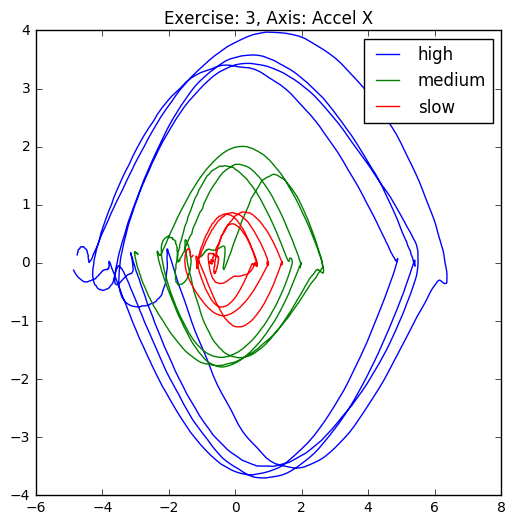

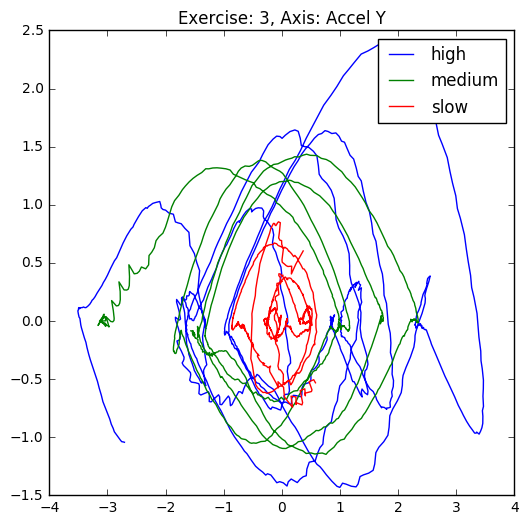

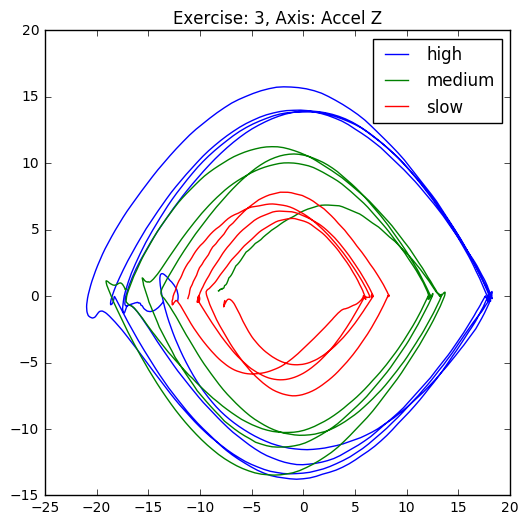

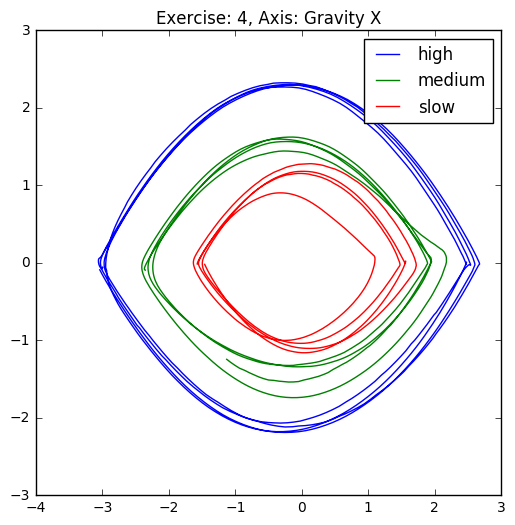

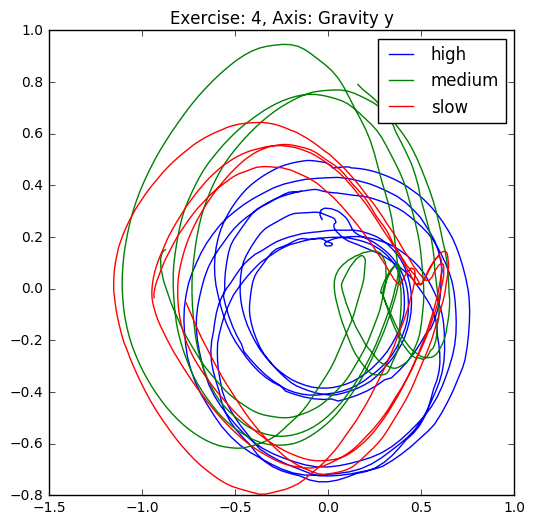

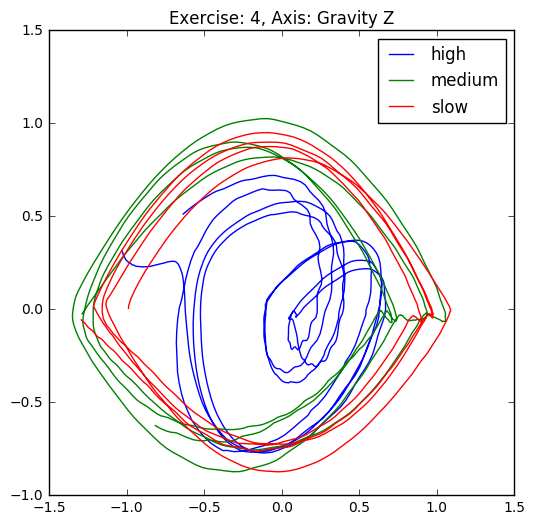

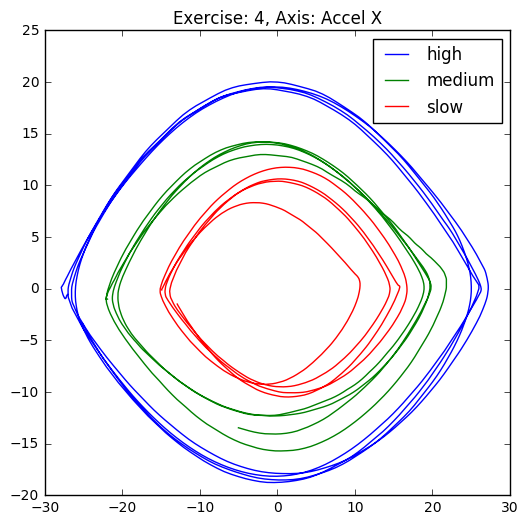

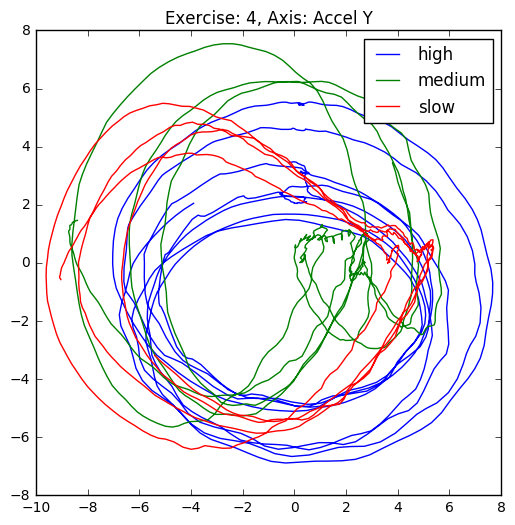

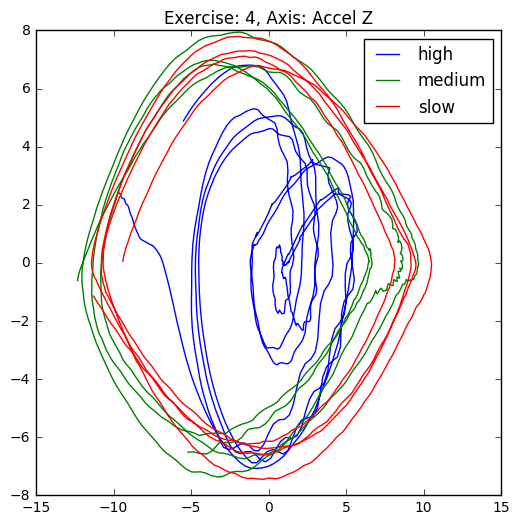

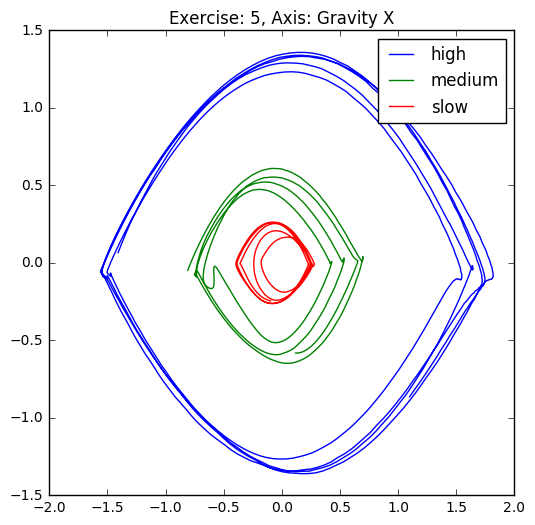

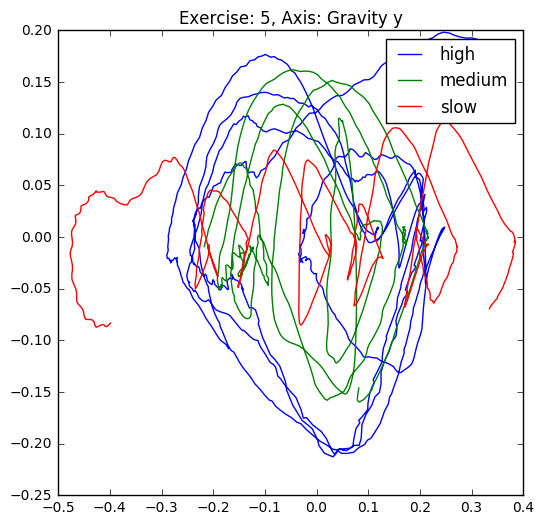

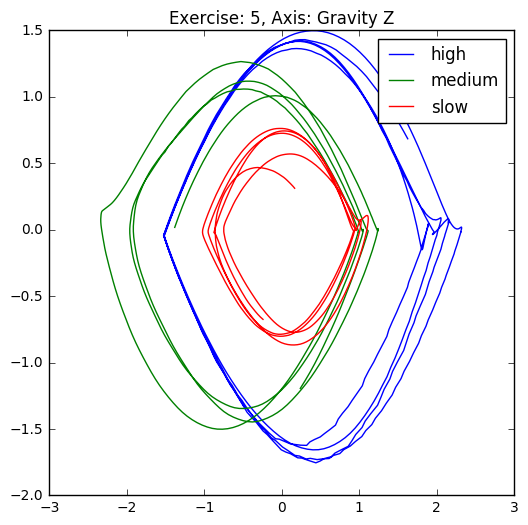

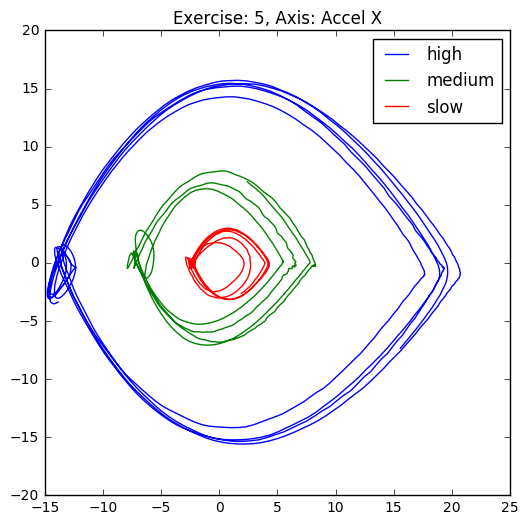

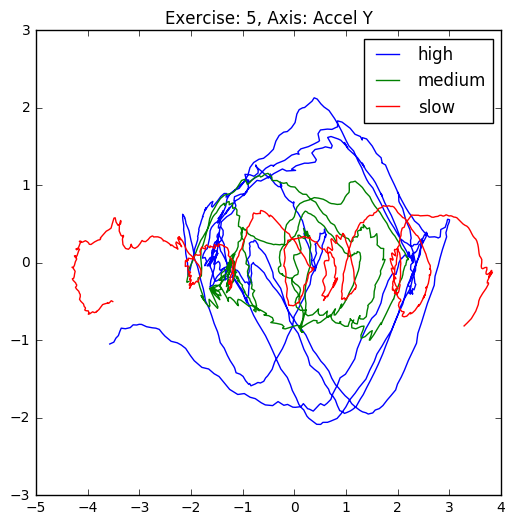

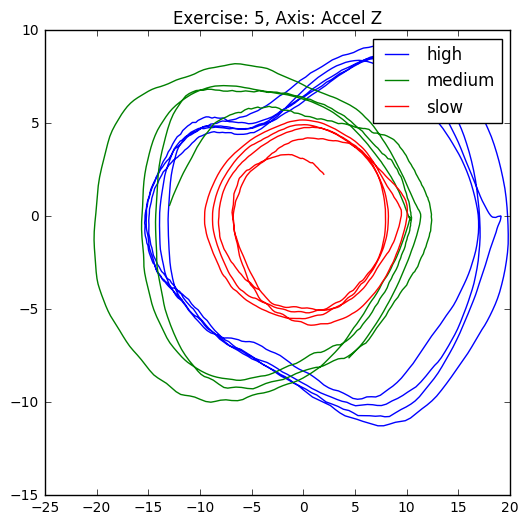

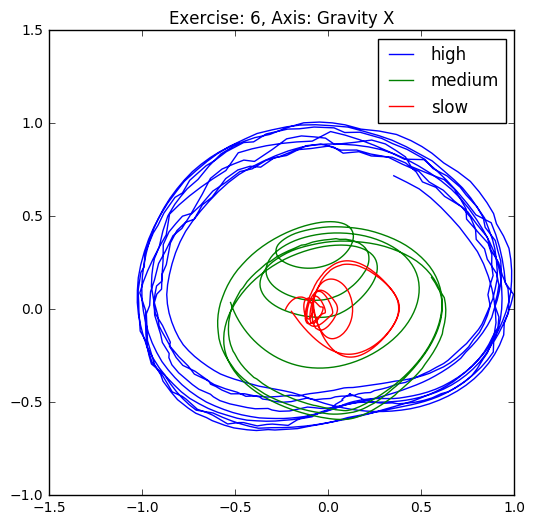

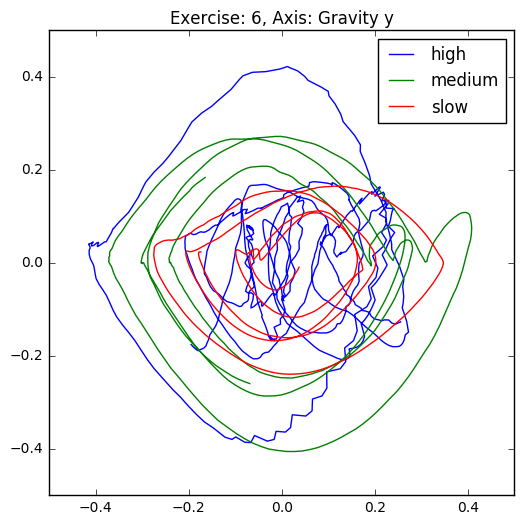

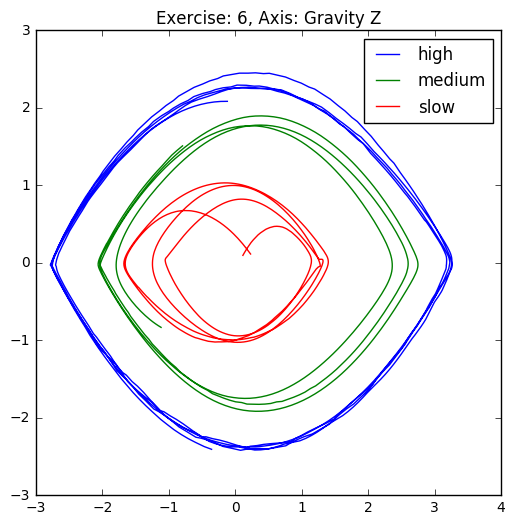

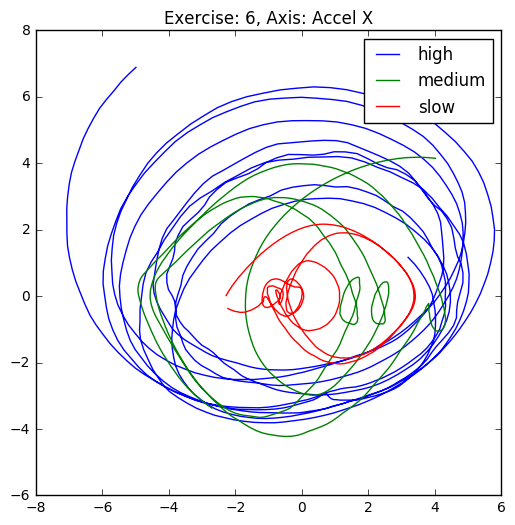

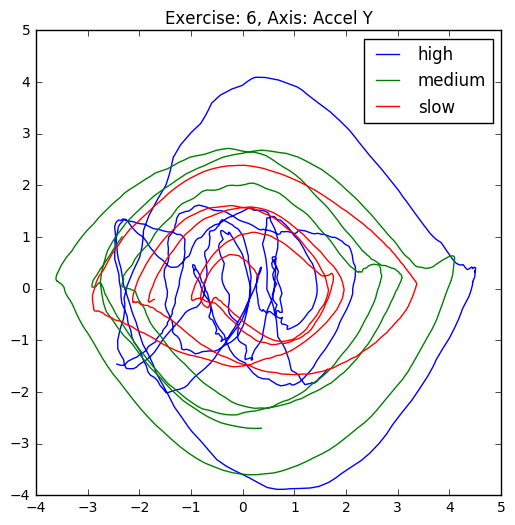

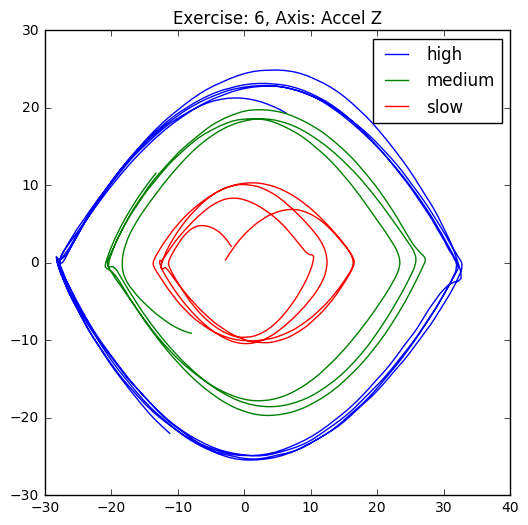

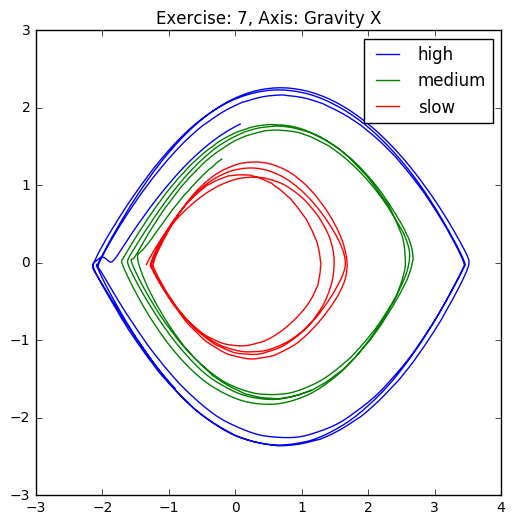

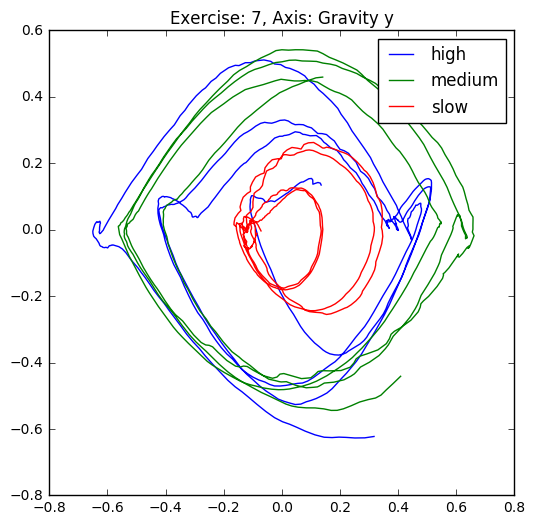

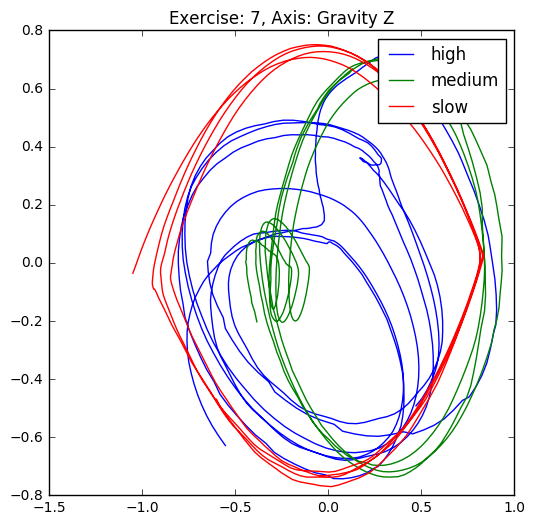

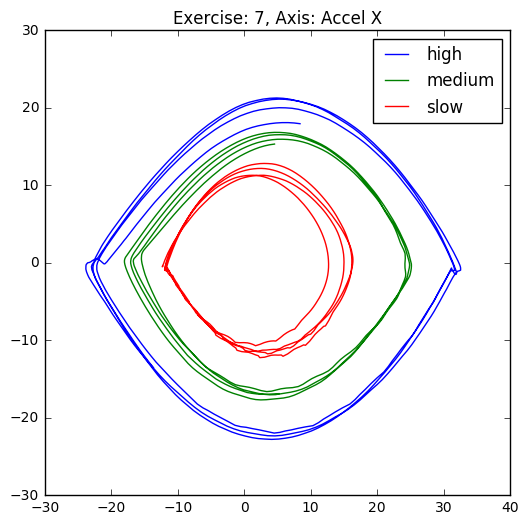

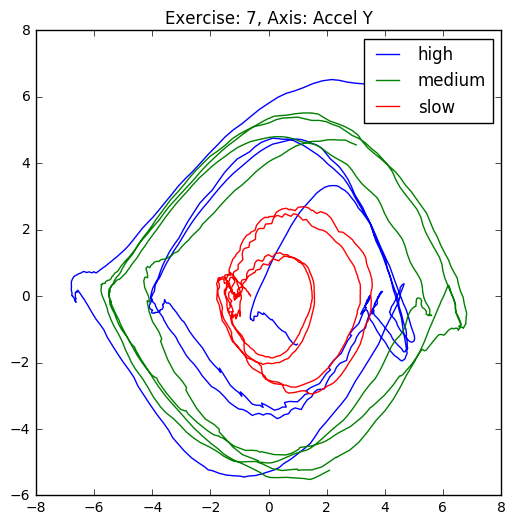

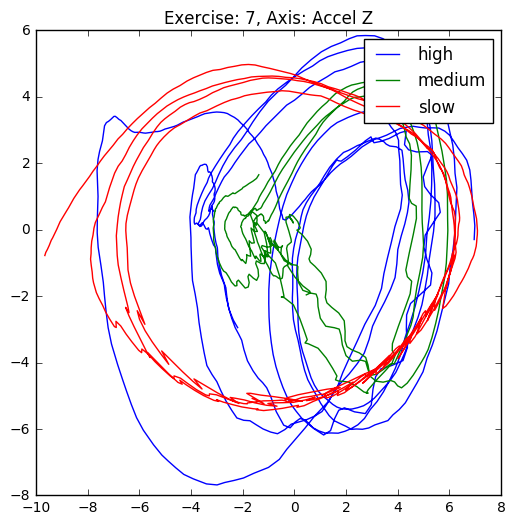

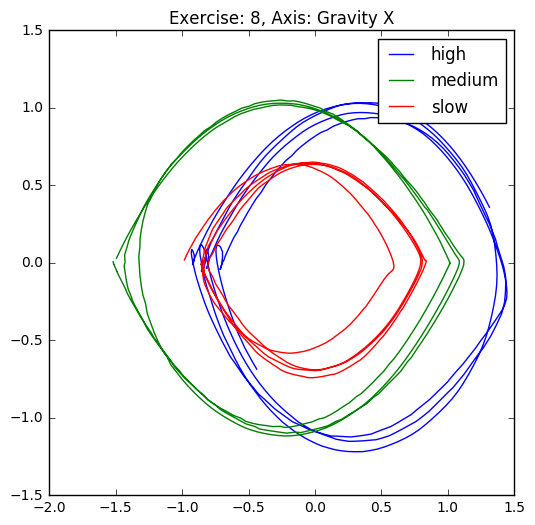

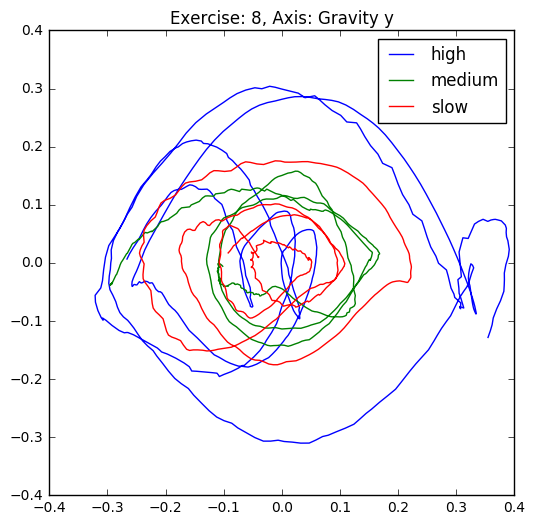

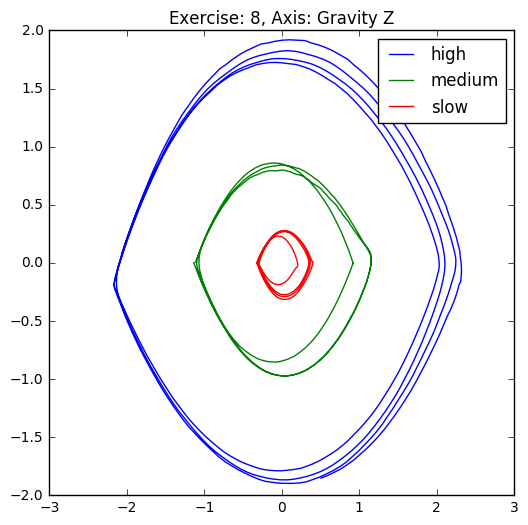

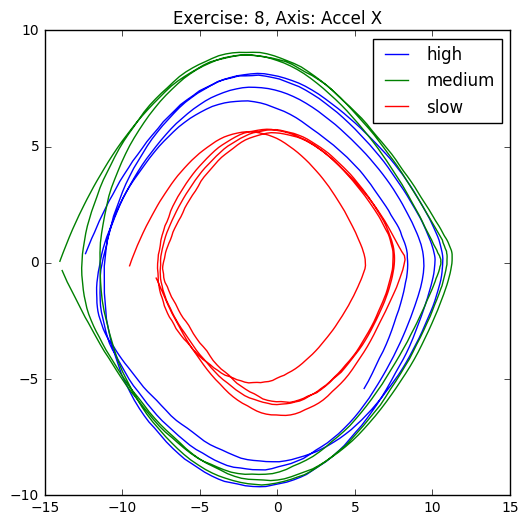

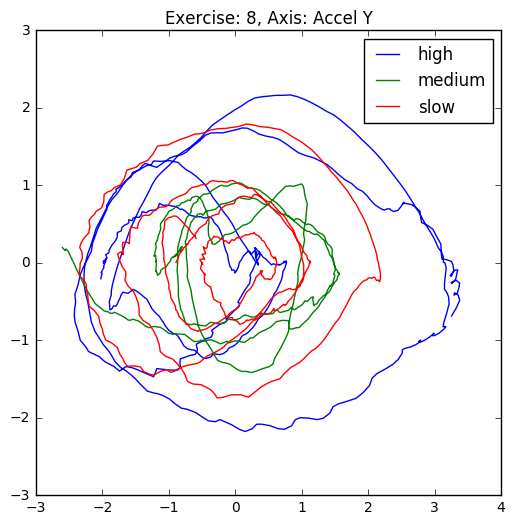

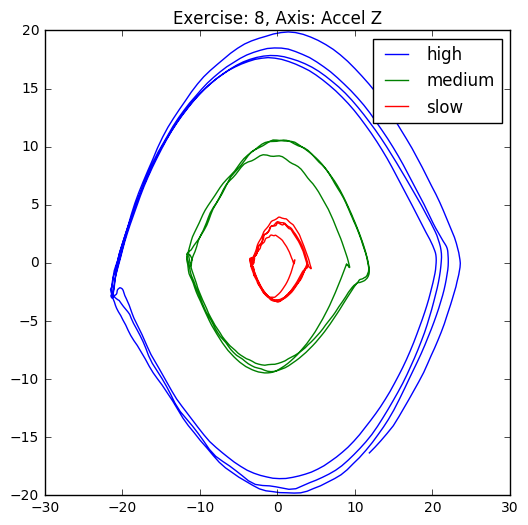

In [62]:
m = 10
tau = 6
labels=['slow', 'medium', 'high']
axis_names = ['time', 'Gravity X', 'Gravity y', 'Gravity Z', 'Accel X', 'Accel Y', 'Accel Z']

for ex in range(1, 9):
    a = annots[annots[:, 0]==ex, :]
    for axis in range(1, 7):
        fig = plt.figure(figsize=(6,6))
        subplot = fig.add_subplot(111)        
        for i in [2, 1, 0]:
            s = a[i, 2]*60 + a[i, 3]
            e = a[i, 4]*60 + a[i, 5]
            d = data[(data[:,0]>=s) & (data[:,0]<=e)]
            d[:, 0] = d[:, 0] - d[0, 0]

            d = time_delay_matrix(d[:, axis], m, tau)    
            d = get_pca_matrix(d)    
            subplot.plot(d[:, 0], d[:, 1], label=labels[i])
        
        plt.legend() 
        plt.title("Exercise: "+str(ex)+", Axis: " + axis_names[axis])
        fig.savefig("figs/Exercise_"+str(ex)+"_Axis_" + axis_names[axis])
        
